In [1]:
import sys
sys.path.append('../../')

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

In [4]:
def col(x):
    return np.array(x).reshape(-1, 1)

# Test LSM Generation

In [5]:
from graspy.simulations import lsm

In [6]:
null_density_fn = lambda : np.random.beta(1, 3) 
alt_density_fn = lambda : np.random.beta(1, 1) 
curve_fn = lambda t: col([np.sin(t * np.pi), np.cos(t * np.pi), 0])
 
A = lsm(null_density_fn, curve_fn, 100)

In [7]:
A.shape

(100, 100)

In [8]:
np.unique(A)

array([0., 1.])

# Test LatentStructureTest

In [9]:
from graspy.inference import LatentStructureTest

In [10]:
A1_1 = lsm(null_density_fn, curve_fn, 512)
A1_2 = lsm(null_density_fn, curve_fn, 512)
A2 = lsm(alt_density_fn, curve_fn, 512)

In [11]:
lst = LatentStructureTest(3)

In [12]:
diff_out = lst.fit(A1_1, A2)
print(diff_out['stat'])

0.265625


In [13]:
same_out = lst.fit(A1_1, A1_2)
print(same_out['stat'])

0.11328125


In [14]:
print(diff_out['stat']> same_out['stat'])

True


# Visualize Reconstructed Samples
Note: Density may be reflected, but due to rotation invariance of latent position, this is not an issue

In [15]:
%matplotlib inline

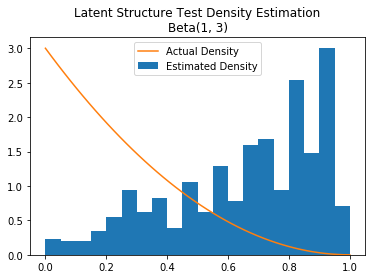

In [16]:
plt.figure()
plt.title('Latent Structure Test Density Estimation\nBeta(1, 3)')
plt.hist(diff_out['curve_positions_1'], density=True, label='Estimated Density', bins=20)
plt.plot(np.linspace(0, 1), [stats.beta(1, 3).pdf(elem) for elem in np.linspace(0, 1)], label='Actual Density')
plt.legend()
plt.show()

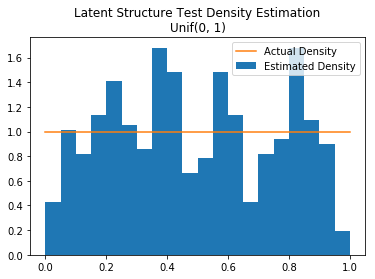

In [17]:
plt.figure()
plt.title('Latent Structure Test Density Estimation\nUnif(0, 1)')
plt.hist(diff_out['curve_positions_2'], density=True, label='Estimated Density', bins=20)
plt.plot(np.linspace(0, 1), [stats.beta(1, 1).pdf(elem) for elem in np.linspace(0, 1)], label='Actual Density')
plt.legend()
plt.show()